# Unit 5 - Financial Planning


In [142]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [143]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [144]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [145]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [146]:
# Fetch current BTC price
btc_price = requests.get(btc_url)

# Fetch current ETH price
eth_price = requests.get(eth_url)

# Retrieve output for BTC & ETH in order to get names of rows
btc_response = btc_price.content
eth_response = eth_price.content

# Convert output to JSON
btc_data = btc_price.json()
eth_data = eth_price.json()

# Fetch prices of both BTC and ETH in order to compute total value of crypto portfolio
btc_price = btc_data['data']['1']['quotes']['USD']['price']
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $68530.80
The current value of your 5.3 ETH is $9405.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [147]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [148]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [150]:
# Format current date as ISO format as of 26th Oct 2020
today = pd.Timestamp("2020-10-26", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-10-26 00:00:00-04:00  117.65  117.72  117.59  117.64  4537207  342.13   

                                                              
                             high     low    close    volume  
time                                                          
2020-10-26 00:00:00-04:00  342.98  335.62  339.415  79491839

In [151]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.64
Current SPY closing price: $339.415


In [152]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16970.75
The current value of your 200 AGG shares is $23528.00


### Savings Health Analysis

In [153]:
# Set monthly household income
monthly_income = 12000

# Creating dictionary to holds the sum of BTC/ETH and SPY/AGG
portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}

# Create savings DataFrame
df_savings = pd.DataFrame(portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,77936.604
Shares,40498.750


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

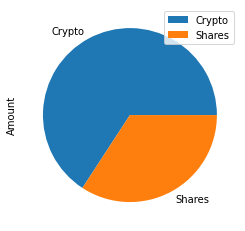

In [154]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [155]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [186]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_Monte_Carlo = pd.Timestamp('2015-10-26', tz='America/New_York').isoformat()
end_date_Monte_Carlo = pd.Timestamp('2020-10-26', tz='America/New_York').isoformat()


In [187]:
 # Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207  342.13   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038  339.76   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671  332.10   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602  326.91   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417  328.28   

                                                                 
                               high     low    close     volume  
time                                                             
2020-10-26 00:00:00-04:00  342.9800  335.62  339.415   79491839  
2020-10-27 00:00:00-04:00  340.1200  337.99  338.250   50634843  
2020-10-28 00:00:00-04:00  338.2483  326.13  326.670  107939571  
2020-10-29 00:00:00-04:00  333.3950  325.09  329.990   74362731  
2020-10-30 00:00:00-04:00  329.6900  322.60  326.530   93413096

In [175]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [176]:
# Printing the simulation input data
MC_thirty_years.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [177]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003986,1.007879,0.994130,1.004140,0.995669,0.992613,1.003932,0.992819,1.006302,1.000661,...,0.998268,0.994043,0.999649,0.996600,0.999317,1.001392,1.002161,0.998913,1.005868,1.000604
2,1.005945,1.007139,1.004511,1.004925,0.992297,0.992458,1.011275,0.996807,1.021413,0.995055,...,0.993280,1.007383,1.003470,0.994759,1.000109,0.991317,0.999244,1.001857,1.001607,0.996192
3,0.994536,1.013615,1.004653,1.012370,0.990350,0.989306,1.013145,1.002657,1.028335,1.000324,...,0.992534,1.019998,0.996786,0.988952,0.996146,0.993950,0.992874,1.003546,1.001206,0.999858
4,0.990137,1.026117,1.000076,1.013787,0.979838,0.990180,1.005453,1.001754,1.030858,1.003964,...,0.991204,1.019997,0.995407,0.984020,0.989358,0.990585,0.989151,0.995817,0.995837,1.000363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,289.497857,241.240233,122.680228,136.385140,117.974538,225.444288,281.174988,346.941014,159.279974,324.432789,...,144.180331,105.206411,449.948607,274.892146,103.136312,72.006248,137.088136,294.997713,196.698313,164.112533
7557,290.222237,239.117117,123.070773,136.755429,119.147433,226.657361,277.271061,345.392048,160.426958,320.797178,...,144.418694,105.675069,451.078894,275.759477,102.583562,72.306397,137.437788,292.406531,195.653958,164.168558
7558,290.974502,238.216929,123.520146,137.751519,119.778850,226.985055,275.292157,345.848725,161.446782,315.096568,...,145.518529,106.157704,453.333448,274.032367,102.623971,72.055473,137.160870,291.928628,195.988895,164.681966
7559,290.399654,238.163128,123.699771,137.724968,120.601097,226.922426,275.436610,346.221416,160.554804,316.021688,...,145.417629,105.443387,450.475931,274.703844,102.312655,72.819053,137.400401,290.098524,196.135322,164.833871


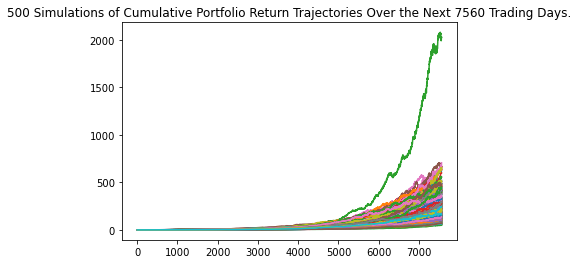

In [191]:
# Plot simulation outcomes
line_plot = MC_thirty_years.plot_simulation()

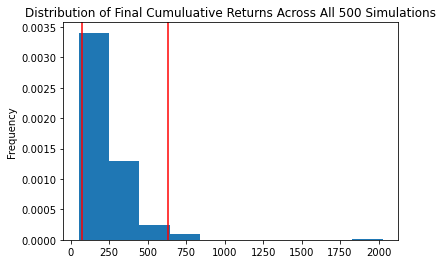

In [192]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [193]:
# Fetch summary statistics from the Monte Carlo simulation results
Table = MC_thirty_years.summarize_cumulative_return()

# Print summary statistics
print(Table)

count            500.000000
mean             228.644059
std              150.512267
min               50.560818
25%              133.655460
50%              195.151010
75%              283.623353
max             2028.341451
95% CI Lower      71.070172
95% CI Upper     630.618123
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [194]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(Table[8]*initial_investment,2)
ci_upper = round(Table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1421403.44 and $12612362.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [195]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(Table[8]*initial_investment,2)
ci_upper = round(Table[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2132105.17 and $18918543.7


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [196]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [197]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999885,1.011250,0.994339,1.001065,0.992535,1.000844,1.004837,0.992772,0.991326,0.997352,...,1.001631,1.002290,0.993504,0.994463,1.003971,1.007750,1.008800,0.994186,1.006431,1.001176
2,1.003372,1.016401,0.991443,1.003783,0.994170,1.009955,0.996885,0.994012,0.990774,0.996488,...,0.997703,1.005300,1.003356,0.993437,1.011461,1.003952,0.998959,0.987449,1.011723,1.008712
3,1.007560,1.031015,0.989517,1.007596,0.990623,1.022971,0.991725,0.993557,0.997125,0.993210,...,0.988673,1.013440,0.998741,0.993129,1.005545,1.011702,1.009797,0.996792,1.016450,1.011375
4,1.019707,1.023292,0.980307,1.000469,0.998663,1.016939,0.992559,0.993795,1.006119,0.996007,...,0.989929,1.007786,0.990462,0.991010,1.013109,1.009728,1.004609,0.990686,1.013730,1.006212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.923772,2.198360,1.766903,2.074409,2.540456,3.179449,2.459849,1.955589,2.392748,2.776301,...,2.590101,1.337442,2.666322,2.163032,2.100388,2.591999,2.568446,2.294435,2.801266,2.115966
1257,1.911004,2.215773,1.769173,2.053711,2.533270,3.179000,2.488472,1.949100,2.401686,2.774469,...,2.582866,1.323884,2.690892,2.187459,2.091158,2.608491,2.595978,2.277291,2.793669,2.093962
1258,1.916328,2.207968,1.758891,2.049268,2.550686,3.215739,2.505169,1.949244,2.439327,2.792947,...,2.562885,1.326382,2.698274,2.165333,2.094341,2.604638,2.603387,2.280723,2.774359,2.105653
1259,1.923142,2.235676,1.767348,2.056024,2.547936,3.244789,2.516822,1.950962,2.425119,2.800438,...,2.566982,1.320765,2.691198,2.133776,2.086852,2.621063,2.599408,2.300406,2.785817,2.108530


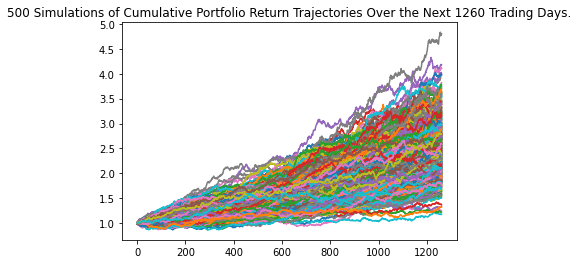

In [198]:
# Plot simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

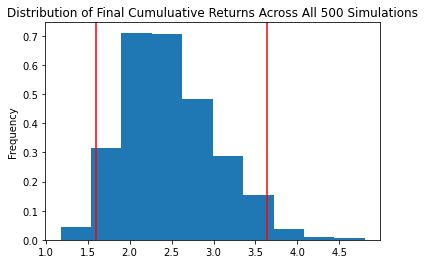

In [199]:
# Plot probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [200]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_five)

count           500.000000
mean              2.489421
std               0.548203
min               1.175959
25%               2.105249
50%               2.423141
75%               2.815409
max               4.804106
95% CI Lower      1.602288
95% CI Upper      3.638221
Name: 1260, dtype: float64


In [202]:
# Set initial investment
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $96137.29 and $218293.28


### Ten Years Retirement Option

In [203]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-10-26 00:00:00-04:00  117.65  117.720  117.5900  117.64  4537207   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.87  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.7200  117.73  5448671   
2020-10-29 00:00:00-04:00  117.76  117.770  117.4000  117.52  8093602   
2020-10-30 00:00:00-04:00  117.45  117.520  117.2200  117.23  6522417   

                                           SPY                             \
                          daily_return    open      high     low    close   
time                                                                        
2020-10-26 00:00:00-04:00          NaN  342.13  342.9800  335.62  339.415   
2020-10-27 00:00:00-04:00     0.001955  339.76  340.1200  337.99  338.250   
2020-10-28 00:00:00-04:00    -0.001188  332.10  338.2483  326.13  326.670   
2020-10-29 00:00:00-04:00    -0.001784  326.91  333.3950  325.09  329.990   
2020-10-30 00:00:00-04:00    -0.002468  328.28  329.6900  322.60  326.530   

                                                   
                              volume daily_return  
time                                               
2020-10-26 00:00:00-04:00   79491839          NaN  
2020-10-27 00:00:00-04:00   50634843    -0.003432  
2020-10-28 00:00:00-04:00  107939571    -0.034235  
2020-10-29 00:00:00-04:00   74362731     0.010163  
2020-10-30 00:00:00-04:00   93413096    -0.010485

In [204]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005411,1.004971,1.001163,0.983122,0.997956,0.992565,0.999576,1.002066,1.008373,0.996166,...,1.001556,0.997931,1.002276,1.010651,0.994974,1.004572,1.001742,1.011245,1.004539,0.992593
2,1.010458,1.000932,1.007184,0.975014,0.998609,0.993483,0.994862,1.009817,1.013001,1.002495,...,1.006440,0.997245,0.994168,1.015084,0.997754,1.000778,1.005544,1.016355,1.000506,0.991516
3,1.003386,1.001229,1.006271,0.966671,0.993569,0.995631,0.978709,1.008829,1.013483,0.999324,...,1.012826,1.000282,0.999134,1.016886,0.999638,0.990845,1.008695,1.023816,0.999249,1.000086
4,0.997165,1.007347,1.000091,0.967088,0.984338,0.991021,0.984106,1.011446,1.018583,1.001823,...,1.011544,0.991634,0.998129,1.019736,1.000849,0.982504,1.015632,1.016159,0.995194,1.005124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.992351,5.802222,6.380978,4.496307,5.616442,4.511155,4.280317,4.712819,5.409889,8.089366,...,7.302318,6.555335,5.746834,9.925480,10.998473,6.349844,8.815481,6.710770,5.578967,7.566700
2517,5.020983,5.765915,6.324618,4.458350,5.669987,4.497580,4.253877,4.737113,5.443018,8.166236,...,7.289316,6.577125,5.764678,10.073643,11.060353,6.431914,8.717206,6.767565,5.596175,7.566558
2518,5.016264,5.773631,6.376080,4.490333,5.697199,4.470645,4.217076,4.748361,5.460008,8.147576,...,7.262029,6.564572,5.714327,10.111155,11.026406,6.465388,8.794506,6.739387,5.611615,7.523050
2519,4.993890,5.774600,6.401724,4.526278,5.741424,4.471930,4.215572,4.741389,5.437353,8.241064,...,7.267550,6.608625,5.730239,10.216860,10.962023,6.504103,8.724119,6.727602,5.643969,7.533599


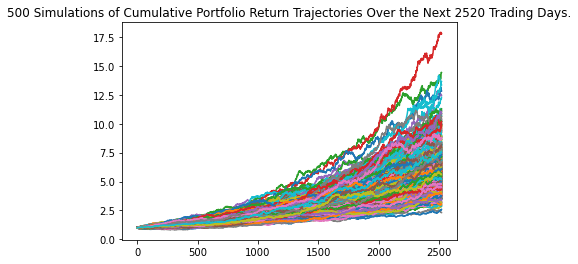

In [205]:
# Plot simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

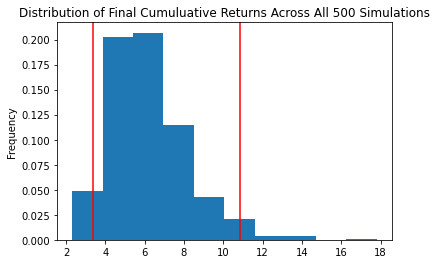

In [206]:
# Plot probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [207]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
print(even_tbl_ten)

count           500.000000
mean              6.218514
std               2.001618
min               2.315517
25%               4.850210
50%               5.827743
75%               7.327398
max              17.787990
95% CI Lower      3.380124
95% CI Upper     10.870315
Name: 2520, dtype: float64


In [208]:
# Set initial investment
initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $202807.42 and $652218.88
